In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import sys
sys.path.append("..")
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from src.unet_models import MODELS

In [2]:
train_x = np.load('../DATASETS/noise_7e-3/src/no_indiv_per_train_6oct_1_512_128_064_032_016_SRC_30_exe_100.npy')
train_y = np.load('../DATASETS/noise_7e-3/label/no_indiv_per_train_6oct_1_512_128_064_032_016_LABEL_30_exe_100.npy')

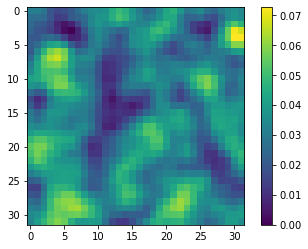

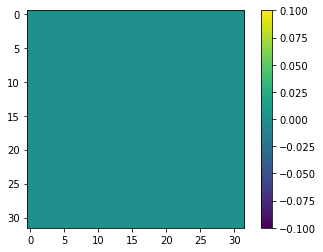

In [3]:
samp = np.random.randint(4,train_x.shape[0],1)[0]
plt.figure()
plt.imshow(train_x[samp])
plt.colorbar()

plt.figure()
plt.imshow(train_y[samp])
plt.colorbar()

In [16]:
bins = 32
channel = 1
loss_func = 'mse'
lr = '1e-4'
opt = tf.keras.optimizers.Nadam(learning_rate=float(lr))
metric = 'mae'
reg = '0'
filt_lst = [64,128,256,512]
dns = 256
drop = '0'
batch_size = 256#
ep=100

In [17]:
get_model = MODELS()
model_type="Unet16"

if model_type=="attention_resunet":
    FILTER_NUM = 16
    FILTER_SIZE = 3
    NUM_CLASSES = 1
    dropout_rate = 0.2
    batch_norm = False
    model = get_model.Attention_ResUNet(bins,channel,loss_func,opt,metric,FILTER_NUM=FILTER_NUM,batch_norm = False, dropout_rate = float(drop))
elif model_type=="unetpp":
    nb_filter = [16, 32, 64, 128, 256]
    deep_supervision = False
    model = get_model.Nest_Net(bins,channel,loss_func,opt,metric,nb_filter=nb_filter,deep_supervision=deep_supervision)
elif model_type=="Unet16":
    filt_num = 16
    model = get_model.UNET(bins, channel, loss_func, opt, metric, float(reg), filt_num)
elif model_type=="vgg16":
    model = get_model.VGG16(filt_lst,dns,bins,channel,loss_func,opt,metric)
elif model_type=="resUnet":
    model = get_model.resUnet(bins, channel, loss_func, opt, metric, float(reg))
elif model_type=="unetPP48163264":
    nb_filter = [4,8,16,32,64]
    filters = [4,8,16,32,64]
    model = get_model.unetPP(bins,channel,loss_func,opt,metric,float(reg), nb_filter, filters)

folder_name = 'sh06x2'
chnl = 'ch0'
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5, verbose=1)
#mc = tf.keras.callbacks.ModelCheckpoint(f'../models/{folder_name}/{model_type}_{folder_name}_{chnl}__256_m_1280_{loss_func}_lr_{lr}_{ep}_DROPOUT{reg}.h5',
#                                       monitor='val_loss', model='min', verbose=1, save_best_only=True)


history=model.fit(train_X[:],train_y[:],
                batch_size=batch_size,epochs=ep,
                validation_split=0.33,shuffle=True, callbacks=[callback])

layer output: (None, 32, 32, 1)
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 conv2d_79 (Conv2D)             (None, 32, 32, 16)   160         ['input_4[0][0]']                
                                                                                                  
 conv2d_80 (Conv2D)             (None, 32, 32, 16)   2320        ['conv2d_79[0][0]']              
                                                                                                  
 max_pooling2d_9 (MaxPooling2D)  (None, 16, 16, 16)  0           ['conv2d_80[0][0]']              
                                                            

8/8 [==============================] - 0s 46ms/step - loss: 0.0092 - mae: 0.0243 - val_loss: 0.0235 - val_mae: 0.0369
Epoch 3/100
8/8 [==============================] - 0s 47ms/step - loss: 0.0091 - mae: 0.0193 - val_loss: 0.0233 - val_mae: 0.0356
Epoch 4/100
8/8 [==============================] - 0s 46ms/step - loss: 0.0090 - mae: 0.0186 - val_loss: 0.0231 - val_mae: 0.0356
Epoch 5/100
8/8 [==============================] - 0s 46ms/step - loss: 0.0089 - mae: 0.0185 - val_loss: 0.0229 - val_mae: 0.0355
Epoch 6/100
8/8 [==============================] - 0s 49ms/step - loss: 0.0088 - mae: 0.0183 - val_loss: 0.0227 - val_mae: 0.0352
Epoch 7/100
8/8 [==============================] - 0s 46ms/step - loss: 0.0087 - mae: 0.0178 - val_loss: 0.0226 - val_mae: 0.0348
Epoch 8/100
8/8 [==============================] - 0s 47ms/step - loss: 0.0086 - mae: 0.0175 - val_loss: 0.0224 - val_mae: 0.0344
Epoch 9/100
8/8 [==============================] - 0s 50ms/step - loss: 0.0086 - mae: 0.0171 - val_los

KeyboardInterrupt: 

In [10]:
train_X = train_x.reshape(train_x.shape[0],32,32,1)#/np.max(train_x)
train_Y = train_y.reshape(train_y.shape[0],32,32,1)

In [11]:
batch_size = 64
epochs = 2500
history = model.fit(train_X, train_Y,
          batch_size=batch_size,
          epochs=epochs,
          #validation_split=.33,
          validation_split = 0.33,          
          verbose=1,
          callbacks=[callback, mc])

Epoch 1/2500


ValueError: in user code:

    File "C:\Users\jigar\anaconda3\lib\site-packages\keras\engine\training.py", line 1051, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jigar\anaconda3\lib\site-packages\keras\engine\training.py", line 1040, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jigar\anaconda3\lib\site-packages\keras\engine\training.py", line 1030, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jigar\anaconda3\lib\site-packages\keras\engine\training.py", line 889, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\jigar\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "dropout_30" (type Dropout).
    
    `rate` must be a scalar or scalar tensor. Received: rate=0
    
    Call arguments received by layer "dropout_30" (type Dropout):
      • inputs=tf.Tensor(shape=(None, 32, 32, 2), dtype=float32)
      • training=True
